In [26]:
import numpy as np
from scipy.interpolate import CubicSpline
from particle.literals import tau_minus
import pandas as pd
from particle import width_to_lifetime, lifetime_to_width # MeV <-> ns
import matplotlib.pyplot as plt

mtau = tau_minus.mass/1000 # GeV
fa = mtau # MeV
speed_light = 29.98 # cm/ns
a_em = 1/137
Gamma0 = lifetime_to_width(26/speed_light)
hbar = lifetime_to_width(1)/1000 # GeV ns
plt.rcParams['text.usetex'] = True

In [27]:
def f(x):
    if x >= 1:
        return np.arcsin(x**-0.5)
    else:
        return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
A1 = lambda x: x*(1-(x-1)*f(x)**2)
B3 = lambda x, y: 1+x*y/(x-y)*(f(x)**2-f(y)**2)
A3 = lambda x, y: 1 + 0.25*y*np.log(-0.25*y+1e-15j)**2+y/x

def Gamma_photons(ma):
    return a_em**2*ma**3/(fa**2*(4*np.pi)**3)*abs(A1(4*mtau**2/ma**2))**2

In [28]:
def coupling_length_S(length, ma, boosted=True):
    s=10.58**2
    if boosted:
        boost = (s+ma**2)/(2*np.sqrt(s)*ma)
    else:
        boost = 1
    return np.sqrt(hbar*speed_light*boost/Gamma_photons(ma)/length)

## $e^+e^-\to\tau^+\tau^-\gamma\gamma$

In [29]:
df_taugamma20fb = pd.read_csv("tautaugammagamma_20fbinv.csv")
df_taugamma50ab = pd.read_csv("tautaugammagamma_50abinv.csv")

Text(0, 0.5, '$|g_\\tau^a|$')

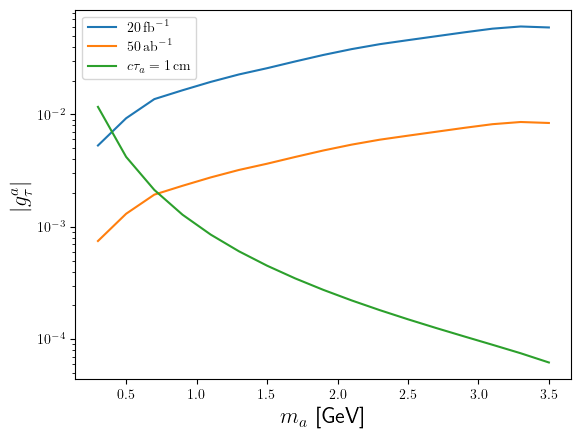

In [30]:
plt.semilogy(df_taugamma20fb['ma_GeV'], df_taugamma20fb['ctau']*mtau*1e-3, label=r'$20\,\mathrm{fb}^{-1}$')
plt.semilogy(df_taugamma50ab['ma_GeV'], df_taugamma50ab['ctau']*mtau*1e-3, label=r'$50\,\mathrm{ab}^{-1}$')
plt.semilogy(df_taugamma20fb['ma_GeV'], [coupling_length_S(25, ma, True) for ma in df_taugamma20fb['ma_GeV']], label=r'$c\tau_a = 1\,\mathrm{cm}$')
plt.legend()
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|g_\tau^a|$', fontsize=16)

In [31]:
interp_taugamma_20fb = CubicSpline(df_taugamma20fb['ma_GeV'], df_taugamma20fb['ctau']*mtau*1e-3)
interp_taugamma_50ab = CubicSpline(df_taugamma50ab['ma_GeV'], df_taugamma50ab['ctau']*mtau*1e-3)

In [32]:
bound_taugamma20fb = []
bound_taugamma50ab =[]
for ma in np.linspace(min(df_taugamma20fb['ma_GeV']), max(df_taugamma20fb['ma_GeV']), 200):
    lim_lifetime = coupling_length_S(25, ma, True)
    lim_exp20fb = interp_taugamma_20fb(ma)
    lim_exp50ab = interp_taugamma_50ab(ma)
    bound_taugamma20fb.append(max(lim_lifetime, lim_exp20fb))
    bound_taugamma50ab.append(max(lim_lifetime, lim_exp50ab))

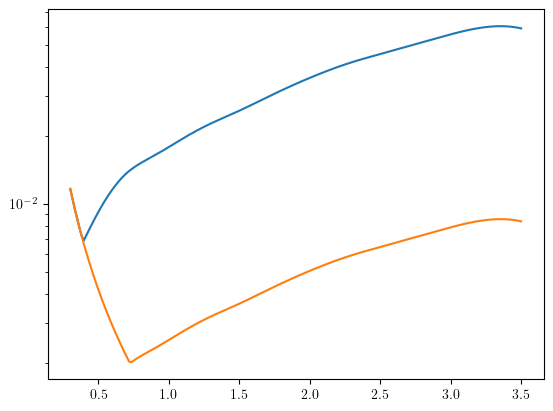

In [33]:
plt.semilogy(np.linspace(min(df_taugamma20fb['ma_GeV']), max(df_taugamma20fb['ma_GeV']), 200), bound_taugamma20fb)
plt.semilogy(np.linspace(min(df_taugamma20fb['ma_GeV']), max(df_taugamma20fb['ma_GeV']), 200), bound_taugamma50ab)

In [34]:
pd.DataFrame({'ma_GeV': np.linspace(min(df_taugamma20fb['ma_GeV']), max(df_taugamma20fb['ma_GeV']), 200), 'gtau_20fb-1': bound_taugamma20fb, 'gtau_50ab-1': bound_taugamma50ab}).to_csv('../data/direct_searches/tautaugammagamma.csv')

## Regions of the parameter space for $e^+e^-\to\gamma \varphi$

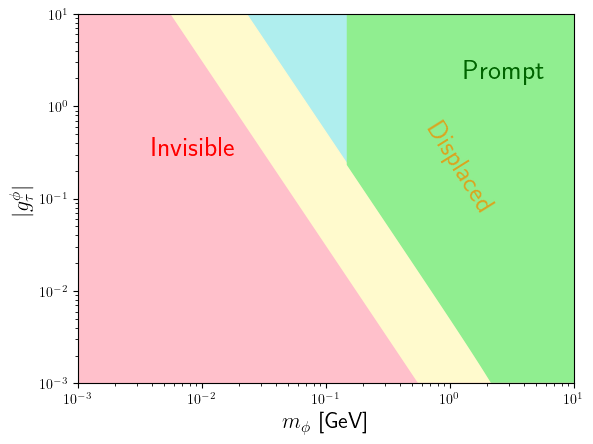

In [35]:
plt.fill_between(np.logspace(-4, np.log10(0.15), 200), [coupling_length_S(1, ma) for ma in np.logspace(-4, np.log10(0.15), 200)], 1e3, color='paleturquoise')
plt.fill_between(np.logspace(-3, 1, 200), [coupling_length_S(300, ma) for ma in np.logspace(-3, 1, 200)], [coupling_length_S(1, ma) for ma in np.logspace(-3, 1, 200)], color='lemonchiffon')
plt.fill_between(np.logspace(np.log10(0.15), 1, 200), [coupling_length_S(1, ma) for ma in np.logspace(np.log10(0.15), 1, 200)], 1e3, color='lightgreen')
plt.fill_between(np.logspace(-3, 1, 200), 1e-3, [coupling_length_S(300, ma) for ma in np.logspace(-3, 1, 200)], color='pink')
plt.ylim(1e-3, 10)
plt.xlim(1e-3, 10)
plt.annotate('Invisible', (4e-3, 3e-1), color='red', fontsize=20)
plt.annotate('Prompt', (1.3, 2), color='darkgreen', fontsize=20)
plt.annotate('Displaced', (0.6, 0.07), color='goldenrod', fontsize=20, rotation=-58)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=16)
plt.ylabel(r'$|g_\tau^\phi|$', fontsize=16)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

## $e^+e^-\to 3\gamma$

In [36]:
df_3gamma_445pb = pd.read_csv('3gamma_445pb.csv')
df_3gamma_20fb = pd.read_csv('3gamma_20fb.csv')
df_3gamma_50ab = pd.read_csv('3gamma_50ab.csv')

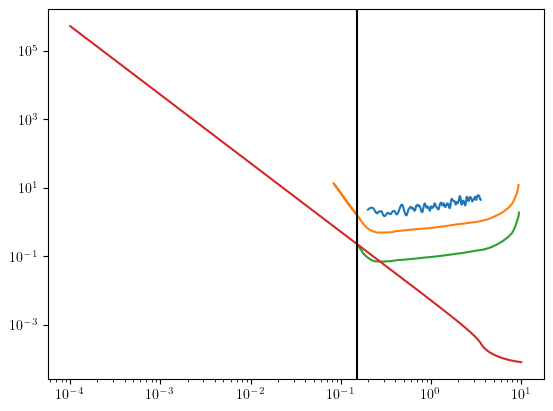

In [37]:
plt.loglog(df_3gamma_445pb['ma_GeV'], df_3gamma_445pb['gtau'])
plt.loglog(df_3gamma_20fb['ma_GeV'], 0.5*df_3gamma_20fb['gtau'])
plt.loglog(df_3gamma_50ab['ma_GeV'], 0.5*df_3gamma_50ab['gtau'])
plt.loglog(np.logspace(-4, 1, 200), [coupling_length_S(1, ma) for ma in np.logspace(-4, 1, 200)])
plt.axvline(0.15, c='k')
#plt.ylim(1e-2, 1e2)
#plt.xlim(1e-4, 2*mtau)

In [38]:
ctau_3gamma_445pb = []
for i, ma in enumerate(df_3gamma_445pb.sort_values(by='ma_GeV')['ma_GeV']):
    ctau_3gamma_445pb.append(max(coupling_length_S(1, ma), df_3gamma_445pb['gtau'][i]))

ctau_3gamma_20fb = []
for i, ma in enumerate(df_3gamma_20fb.sort_values(by='ma_GeV')['ma_GeV']):
    ctau_3gamma_20fb.append(max(coupling_length_S(1, ma), 0.5*df_3gamma_20fb['gtau'][i]))

ctau_3gamma_50ab = []
for i, ma in enumerate(df_3gamma_50ab.sort_values(by='ma_GeV')['ma_GeV']):
    ctau_3gamma_50ab.append(max(coupling_length_S(1, ma), 0.5*df_3gamma_50ab['gtau'][i]))

In [49]:
interp_3gamma_445pb = CubicSpline(df_3gamma_445pb.sort_values(by='ma_GeV')['ma_GeV'], ctau_3gamma_445pb)
interp_3gamma_20fb = CubicSpline(df_3gamma_20fb.sort_values(by='ma_GeV')['ma_GeV'][5:], ctau_3gamma_20fb[5:])
interp_3gamma_50ab = CubicSpline(df_3gamma_50ab.sort_values(by='ma_GeV')['ma_GeV'], ctau_3gamma_50ab)

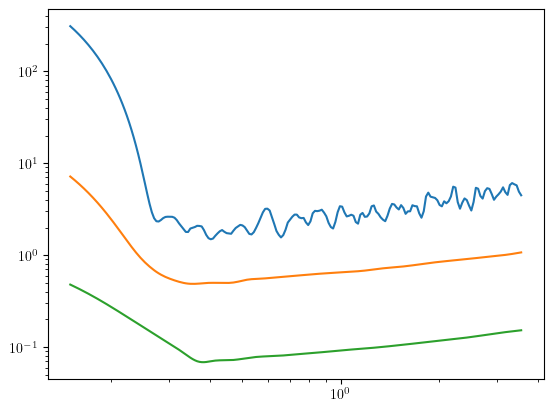

In [50]:
#plt.scatter(df_3gamma_20fb.sort_values(by='ma_GeV')['ma_GeV'], ctau_3gamma_20fb)
plt.plot(np.logspace(np.log10(0.15), np.log10(2*mtau), 200), [interp_3gamma_445pb(ma) for ma in np.logspace(-1, np.log10(2*mtau), 200)])
plt.plot(np.logspace(np.log10(0.15), np.log10(2*mtau), 200), [interp_3gamma_20fb(ma) for ma in np.logspace(-1, np.log10(2*mtau), 200)])
plt.plot(np.logspace(np.log10(0.15), np.log10(2*mtau), 200), [interp_3gamma_50ab(ma) for ma in np.logspace(-1, np.log10(2*mtau), 200)])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

In [51]:
pd.DataFrame({
    'ma_GeV': np.logspace(np.log10(0.15), np.log10(2*mtau), 200),
    'gtau_445pb-1': [interp_3gamma_445pb(ma) for ma in np.logspace(np.log10(0.15), np.log10(2*mtau), 200)],
    'gtau_20fb-1': [interp_3gamma_20fb(ma) for ma in np.logspace(np.log10(0.15), np.log10(2*mtau), 200)],
    'gtau_50ab-1': [interp_3gamma_50ab(ma) for ma in np.logspace(np.log10(0.15), np.log10(2*mtau), 200)]
}).to_csv('../data/direct_searches/ee3gamma.csv', index=False)

## $e^+e^-\to \gamma +$ inv

In [42]:
df_gammainv_20fb = pd.read_csv('gammainv_20fb.csv')
df_gammainv_50ab = pd.read_csv('gammainv_50ab.csv')
lim_BaBar_gtau = 0.3608

(0.001, 1000.0)

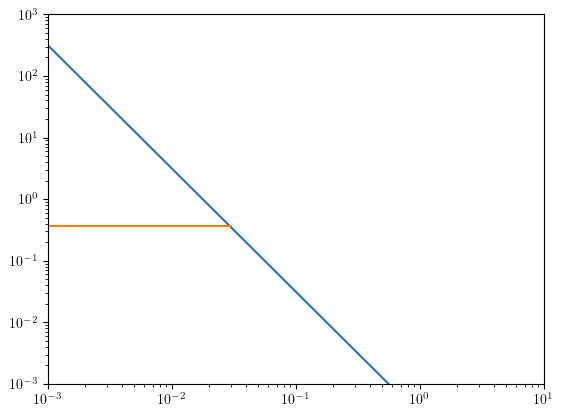

In [52]:
#plt.loglog(df_gammainv_BaBar['ma_GeV'], lim_BaBar_gtau)
plt.loglog(np.logspace(-4, 1, 200), [coupling_length_S(275, ma) for ma in np.logspace(-4, 1, 200)])
plt.loglog([1e-3, 3e-2], [lim_BaBar_gtau, lim_BaBar_gtau])
plt.xlim(1e-3, 10)
plt.ylim(1e-3, 1e3)

(0.001, 1000.0)

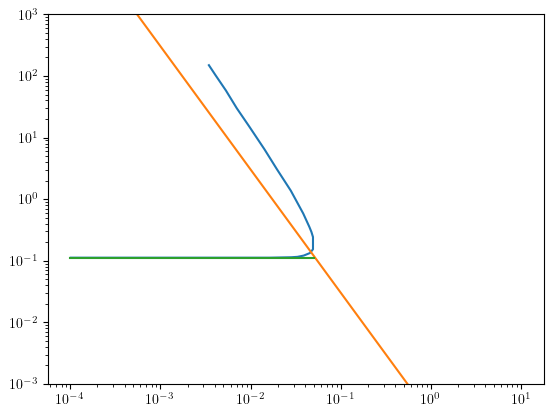

In [54]:
plt.loglog(df_gammainv_20fb['ma_GeV'], 0.5*df_gammainv_20fb['gtau'])
plt.loglog(np.logspace(-4, 1, 200), [coupling_length_S(300, ma) for ma in np.logspace(-4, 1, 200)])
plt.plot([1e-4, 5e-2], [0.5*df_gammainv_20fb['gtau'][0], 0.5*df_gammainv_20fb['gtau'][0]])
plt.ylim(1e-3, 1e3)

(0.001, 1000.0)

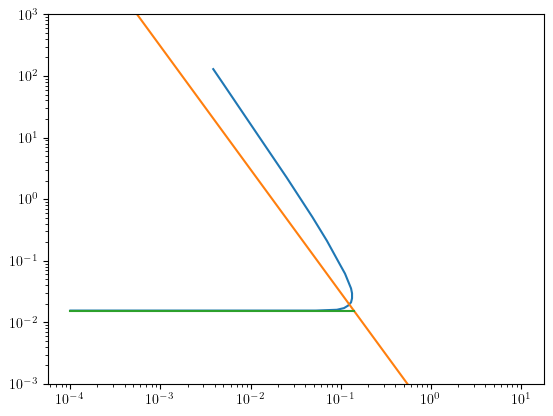

In [59]:
plt.loglog(df_gammainv_50ab['ma_GeV'], 0.5*df_gammainv_50ab['gtau'])
plt.loglog(np.logspace(-4, 1, 200), [coupling_length_S(300, ma) for ma in np.logspace(-4, 1, 200)])
plt.plot([1e-4, 1.4e-1], [0.5*df_gammainv_50ab['gtau'][0], 0.5*df_gammainv_50ab['gtau'][0]])
plt.ylim(1e-3, 1e3)

In [63]:
low_gammainv_BaBar = [lim_BaBar_gtau if ma<3e-2 else np.nan for ma in np.logspace(-4, np.log10(1.4e-1), 200)]

low_gammainv_20fb = [0.5*df_gammainv_20fb['gtau'][0] if ma<5e-2 else np.nan for ma in np.logspace(-4, np.log10(1.4e-1), 200)]

(0.001, 10)

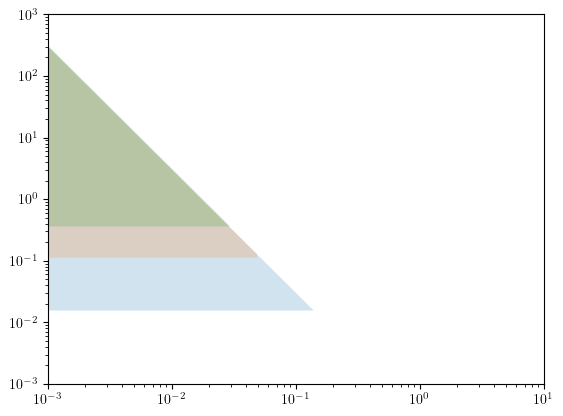

In [64]:

plt.fill_between(np.logspace(-4, np.log10(1.4e-1), 200), 0.5*df_gammainv_50ab['gtau'][0], [coupling_length_S(300, ma) for ma in np.logspace(-4, np.log10(1.4e-1), 200)], alpha=0.2)
plt.fill_between(np.logspace(-4, np.log10(1.4e-1), 200), low_gammainv_20fb, [coupling_length_S(300, ma) for ma in np.logspace(-4, np.log10(1.4e-1), 200)], alpha=0.2)
plt.fill_between(np.logspace(-4, np.log10(1.4e-1), 200), low_gammainv_BaBar, [coupling_length_S(275, ma) for ma in np.logspace(-4, np.log10(1.4e-1), 200)], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(1e-3, 1000)
plt.xlim(1e-3, 10)

In [65]:
pd.DataFrame({
    'ma_GeV': np.logspace(-4, np.log10(1.4e-1), 200),
    'gtau_BaBar': low_gammainv_BaBar,
    'gtau_20fb-1': low_gammainv_20fb,
    'gtau_50ab-1': [0.5*df_gammainv_50ab['gtau'][0]]*200,
    'gtau_3m': [coupling_length_S(300, ma) for ma in np.logspace(-4, np.log10(1.4e-1), 200)]
}).to_csv('../data/direct_searches/gammainv.csv')